In [1]:
from utils.drawing import *
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  f1_score , confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
from joblib import dump

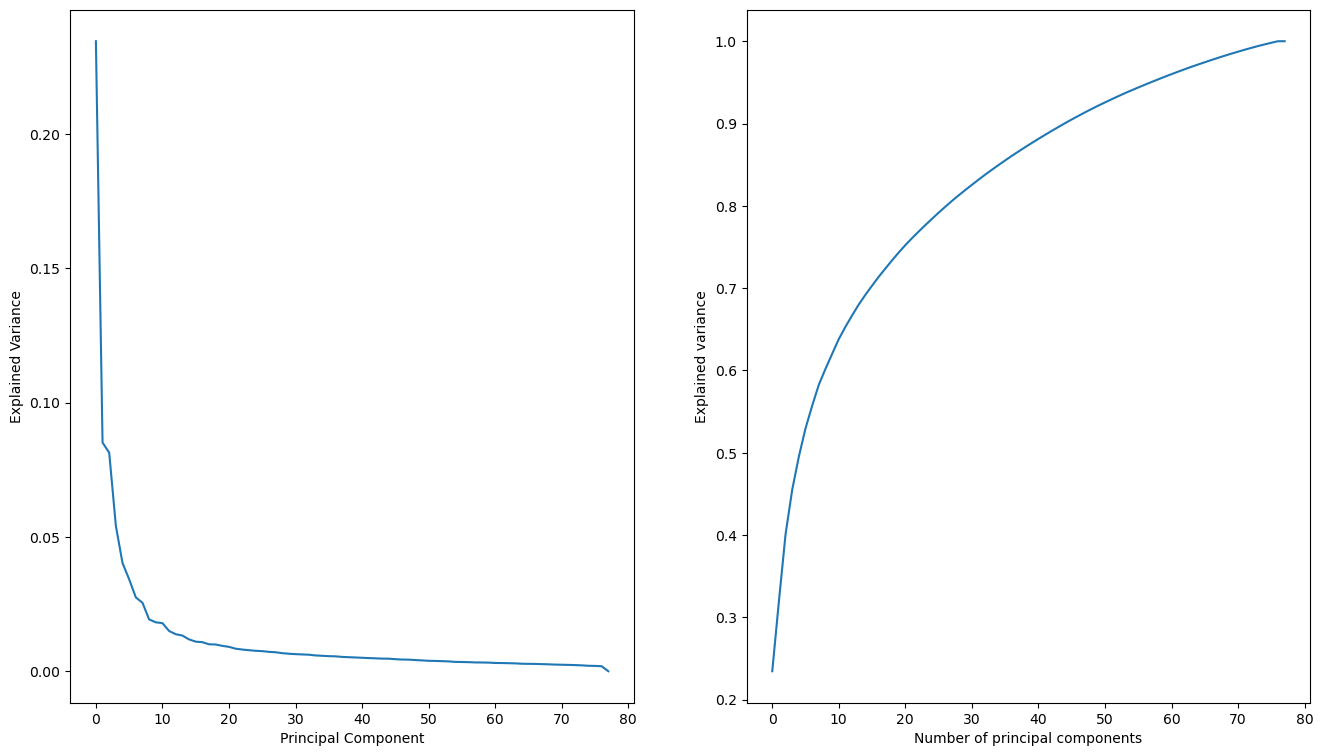

In [2]:
X_train, X_test, y_train, y_test, pca_names, df = load_preprocess_data('../../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv',
                                                                       ['samples','type'], 'type')

NO SMOTING

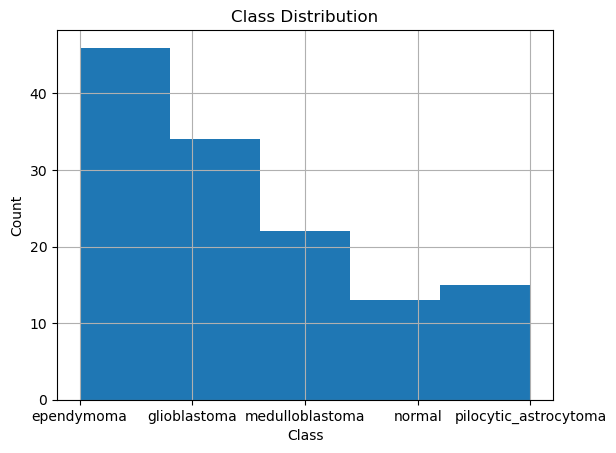

In [3]:
plot_class_distribution(df, 'type')

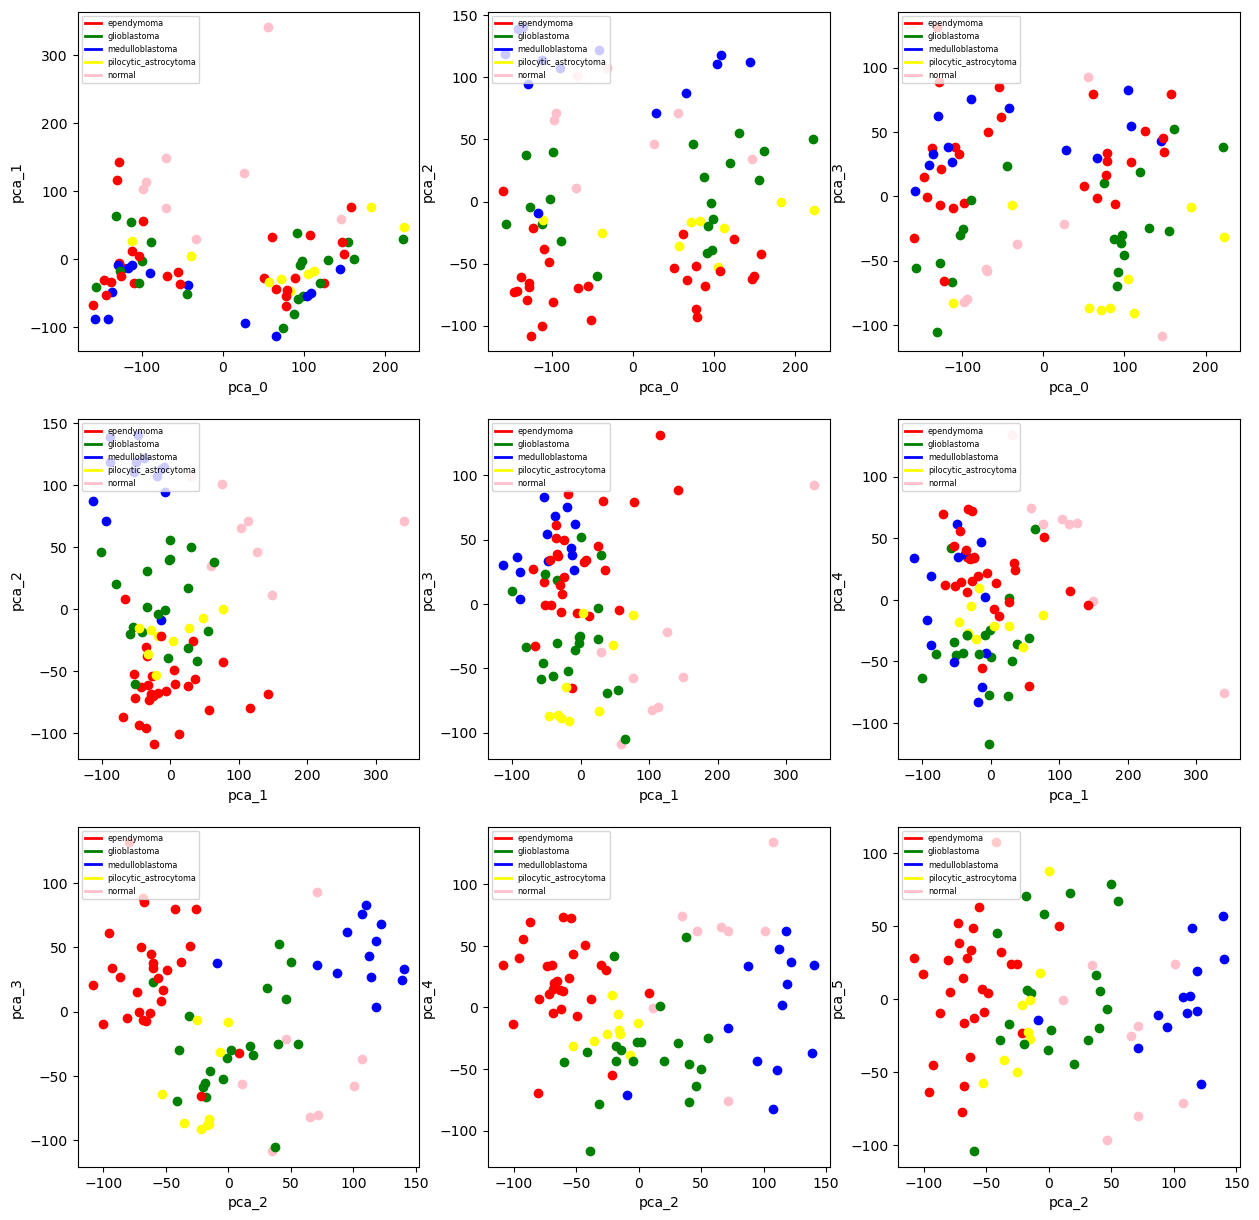

In [4]:
df_pca = pd.DataFrame(X_train, columns = pca_names)
print_classes(3 ,3 ,np.array(y_train) , df_pca)

In [5]:
params = {'weights' : ['uniform', 'distance'],
          'p' : range(1,10)}
estimator_NO_SMOTE = GridSearchCV(KNeighborsClassifier(), param_grid= params, verbose= 3)
estimator_NO_SMOTE.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..............p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END ..............p=1, weights=uniform;, score=0.562 total time=   0.0s
[CV 3/5] END ..............p=1, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/5] END ..............p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5] END ..............p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 1/5] END .............p=1, weights=distance;, score=0.688 total time=   0.0s
[CV 2/5] END .............p=1, weights=distance;, score=0.562 total time=   0.0s
[CV 3/5] END .............p=1, weights=distance;, score=0.875 total time=   0.0s
[CV 4/5] END .............p=1, weights=distance;, score=0.733 total time=   0.0s
[CV 5/5] END .............p=1, weights=distance;, score=0.733 total time=   0.0s
[CV 1/5] END ..............p=2, weights=uniform;, score=0.688 total time=   0.0s
[CV 2/5] END ..............p=2, weights=uniform;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'p': range(1, 10), 'weights': ['uniform', 'distance']},
             verbose=3)

In [6]:
estimator_NO_SMOTE.best_params_

{'p': 2, 'weights': 'distance'}

Accuracy:  0.8076923076923077 F1 score:  0.7989368097965384


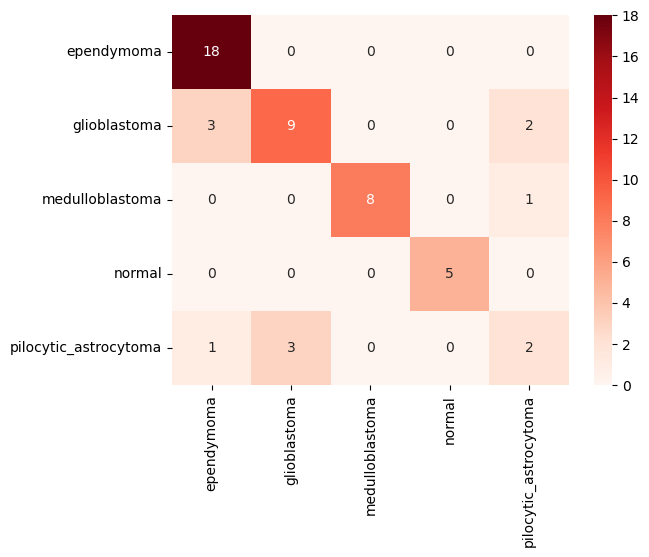

In [7]:
y_predict = estimator_NO_SMOTE.best_estimator_.predict(X_test)

accuracy_NO_SMOTE = accuracy_score(y_test,y_predict)
f1_NO_SMOTE = f1_score(y_test,y_predict, average='weighted')
print('Accuracy: ',accuracy_score(y_test,y_predict),
      'F1 score: ', f1_score(y_test,y_predict, average = 'weighted'))
data = confusion_matrix(y_test, y_predict)
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

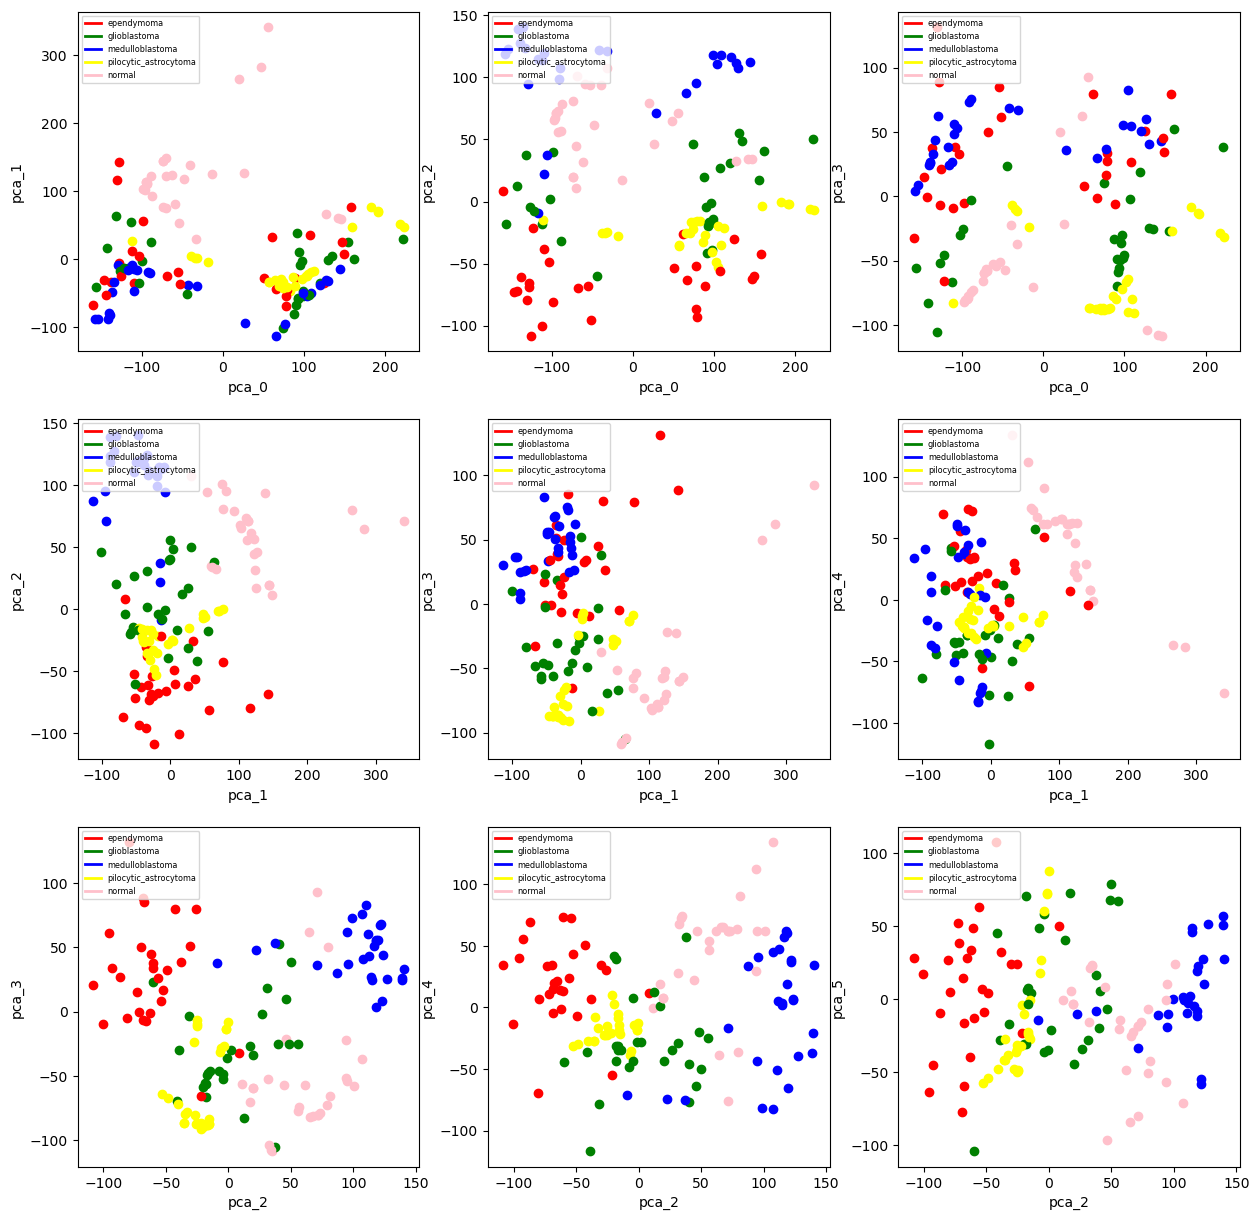

In [8]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
df_pca_SMOTE = pd.DataFrame(X_train_smote, columns = pca_names)
print_classes(3 ,3 ,np.array(y_train_smote) , df_pca_SMOTE)

In [9]:
estimator_SMOTE = GridSearchCV(KNeighborsClassifier(), param_grid= params, verbose= 3)
estimator_SMOTE.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..............p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 2/5] END ..............p=1, weights=uniform;, score=0.679 total time=   0.0s
[CV 3/5] END ..............p=1, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END ..............p=1, weights=uniform;, score=0.857 total time=   0.0s
[CV 5/5] END ..............p=1, weights=uniform;, score=0.821 total time=   0.0s
[CV 1/5] END .............p=1, weights=distance;, score=0.857 total time=   0.0s
[CV 2/5] END .............p=1, weights=distance;, score=0.643 total time=   0.0s
[CV 3/5] END .............p=1, weights=distance;, score=0.786 total time=   0.0s
[CV 4/5] END .............p=1, weights=distance;, score=0.857 total time=   0.0s
[CV 5/5] END .............p=1, weights=distance;, score=0.929 total time=   0.0s
[CV 1/5] END ..............p=2, weights=uniform;, score=0.679 total time=   0.0s
[CV 2/5] END ..............p=2, weights=uniform;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'p': range(1, 10), 'weights': ['uniform', 'distance']},
             verbose=3)

Accuracy:  0.7884615384615384 F1 score:  0.8029250161603103


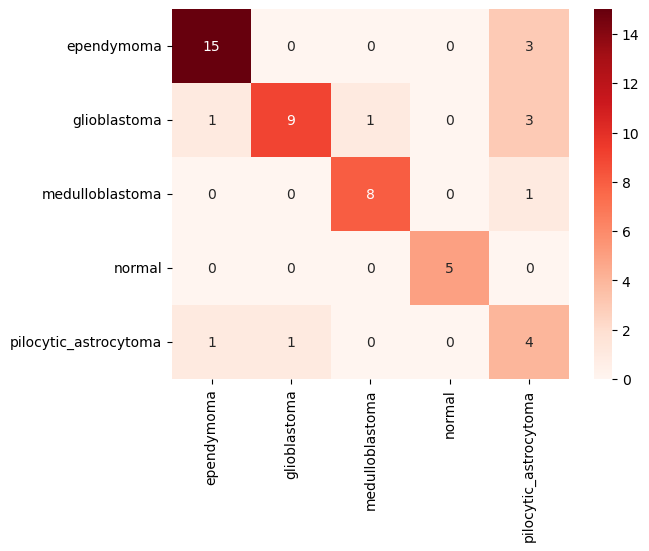

In [10]:
y_predict = estimator_SMOTE.best_estimator_.predict(X_test)
accuracy_SMOTE = accuracy_score(y_test,y_predict)
f1_SMOTE = f1_score(y_test,y_predict, average='weighted')
print('Accuracy: ',accuracy_score(y_test,y_predict),
      'F1 score: ', f1_score(y_test,y_predict, average = 'weighted'))
data = confusion_matrix(y_test, y_predict)
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

In [11]:
labels = ['Accuracy NO SMOTE', 'F1 NO SMOTE', 'Accuracy SMOTE', 'F1 SMOTE']
values = [accuracy_NO_SMOTE,f1_NO_SMOTE,accuracy_SMOTE,f1_SMOTE]

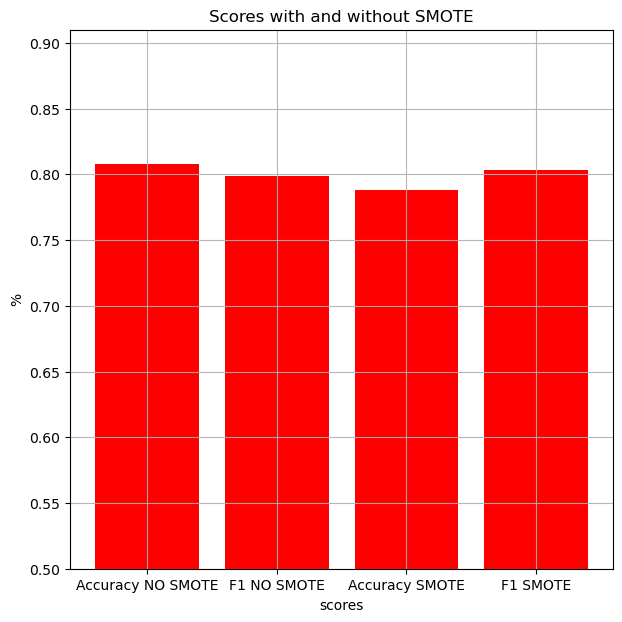

In [15]:
plt.figure(figsize=(7,7))
plt.bar(labels, values, color = 'red')
plt.grid(alpha=0.9)
plt.ylim(0.5, 0.91)
plt.xlabel('scores')
plt.ylabel('%')
plt.title('Scores with and without SMOTE')
plt.show()

In [13]:
dump(estimator_NO_SMOTE.best_estimator_, 'knn_smote.pkl')
dump(estimator_SMOTE.best_estimator_, 'knn_no_smote.pkl')

['knn_no_smote.pkl']